In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.utils import to_categorical

from bim_method import BIM
from illcm_method import ILLCM
from fgsm_method import FGSM
from jsma_method import JSMA

from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

111


In [4]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

## load MNIST dataset

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape((-1, img_rows, img_cols, channels))
X_test = X_test.reshape((-1, img_rows, img_cols, channels))

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

## load CIFAR dataset

In [6]:
(X_train_C, y_train_C), (X_test_C, y_test_C) = cifar10.load_data()

img_cols_C, img_rows_C, channels_C = 32, 32, 3
num_classes_C = 10

X_train_C = X_train_C / 255
X_test_C = X_test_C / 255

X_train_C = X_train_C.reshape((-1, img_rows_C, img_cols_C, channels_C))
X_test_C = X_test_C.reshape((-1, img_rows_C, img_cols_C, channels_C))

y_train_C = to_categorical(y_train_C, num_classes_C)
y_test_C = to_categorical(y_test_C, num_classes_C)

labels_C = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## load CIFAR model
   * original model
   * adversarial model

In [174]:
jfile = open("../CNN_model_cifar.json", "r")
loaded_json1 = jfile.read()
jfile.close()
loaded_model1 = model_from_json(loaded_json1)
loaded_model1.load_weights("../CNN_model_cifar.h5")
loaded_model1.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss="categorical_crossentropy", metrics=['accuracy'])

loaded_model1.summary()

jfile = open("../CNN_model_cifar_adversarial1.json", "r")
loaded_json_adv1 = jfile.read()
jfile.close()
loaded_model_adv1 = model_from_json(loaded_json_adv1)
loaded_model_adv1.load_weights("../CNN_model_cifar_adversarial1.h5")
loaded_model_adv1.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])


Model: "CNN_model_cifar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)    

In [8]:
predictions = loaded_model1.predict(X_test_C)
print(labels[loaded_model1.predict(X_test_C[2].reshape((1, img_rows_C, img_cols_C, channels_C))).argmax()])
pred = list()
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))

test = list()
for i in range(len(y_test_C)):
    test.append(np.argmax(y_test_C[i]))

evaluation = loaded_model1.evaluate(X_test_C, y_test_C)
print(pred, "\n", test)

print("\n%s: %.2f%%" % (loaded_model1.metrics_names[1], evaluation[1]*100))

eight
313/313 [==============================] - 14s 44ms/step - loss: 0.4209 - accuracy: 0.8609

## load MNIST model
   * original model
   * adversarial model

In [171]:
jfile = open("../CNN_model_mnist.json", "r")
loaded_json = jfile.read()
jfile.close()
loaded_model = model_from_json(loaded_json)
loaded_model.load_weights("../CNN_model_mnist.h5")
loaded_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

jfile = open("../CNN_model_mnist_adversarial.json", "r")
loaded_json_adv = jfile.read()
jfile.close()
loaded_model_adv = model_from_json(loaded_json_adv)
loaded_model_adv.load_weights("../CNN_model_mnist_adversarial.h5")
loaded_model_adv.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [10]:
predictions = loaded_model.predict(X_test)
print(labels[loaded_model.predict(X_test[2].reshape((1, img_rows, img_cols, channels))).argmax()])
pred = list()
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

evaluation = loaded_model.evaluate(X_test, y_test)
print(pred, "\n", test)

print("\n%s: %.2f%%" % (loaded_model.metrics_names[1], evaluation[1]*100))

one
313/313 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9790  

## Basic-Iterative method - BIM:
* Experiments with BIM: MNIST, CIFAR

In [160]:
bim0 = BIM(0.7, loaded_model)
bim = BIM(0.3, loaded_model)
bim1 = BIM(0.3, loaded_model)

image0 = X_test[133].reshape((1, img_rows, img_cols, channels))
true_label0 = y_test[133]

image = X_train[65].reshape((1, img_rows, img_cols, channels))
true_label = y_train[65]

image1 = X_test[315].reshape((1, img_rows, img_cols, channels))
true_label1 = y_test[315]

adv0, pert0 = bim0.adversarial_pattern(image0, true_label=true_label0, alpha=0.7/40, iterations=40)
adv, pert = bim.adversarial_pattern(image, true_label=true_label, alpha=0.3/50, iterations=50)
adv1, pert1 = bim1.adversarial_pattern(image1, true_label=true_label1, alpha=0.3/50., iterations=50)

## MNIST


Original image: seven


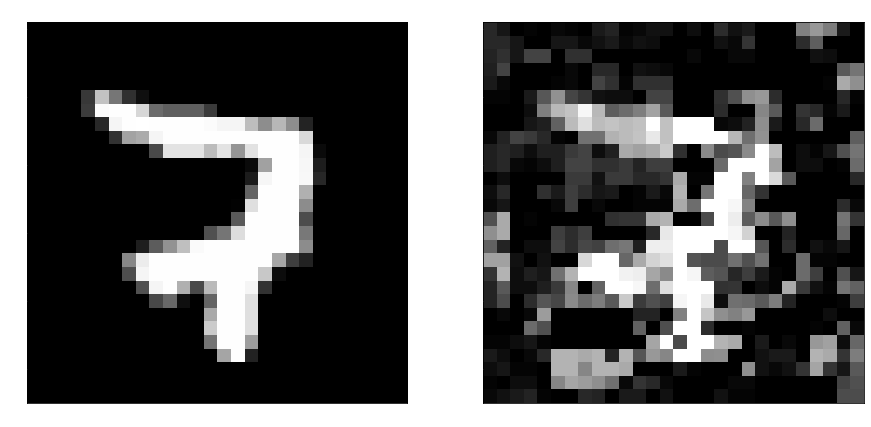

In [245]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(X_test[133].reshape(28, 28), cmap="gray")
print(f"Original image: {labels[np.argmax(y_test[133])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv0, (28, 28)), cmap="gray")

Original image: five


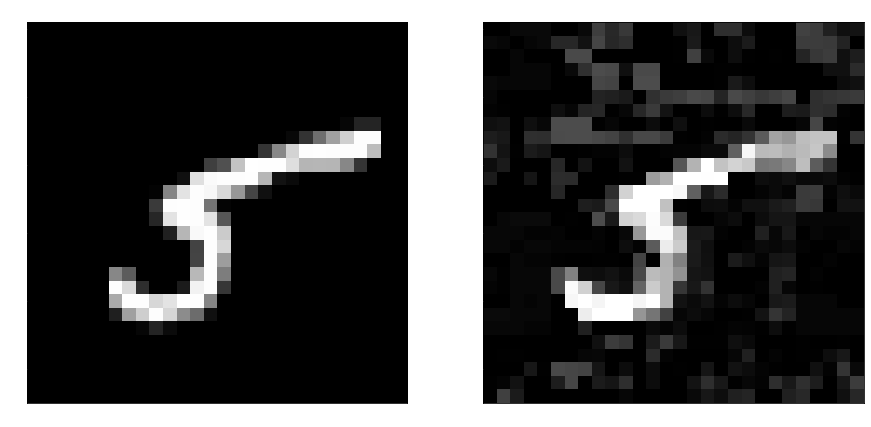

In [13]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(X_train[65].reshape(28, 28), cmap="gray")
print(f"Original image: {labels[np.argmax(y_train[65])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv, (28, 28)), cmap="gray")


Original image: nine


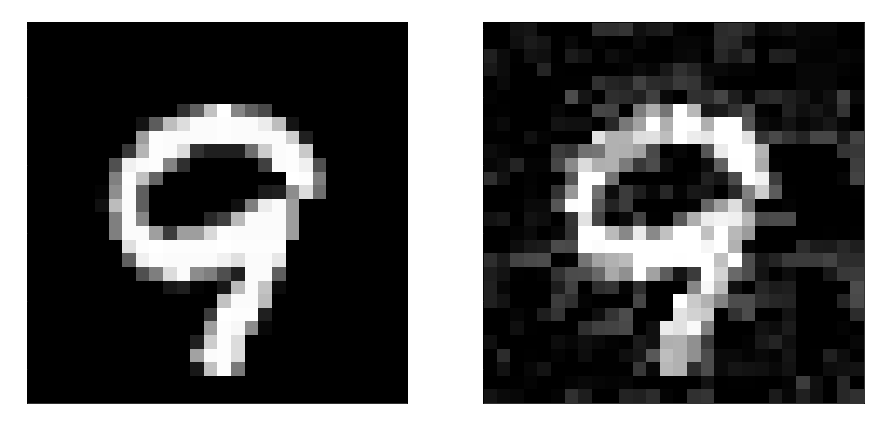

In [163]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(X_test[315].reshape(28, 28), cmap="gray")
print(f"Original image: {labels[np.argmax(y_test[315])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv1, (28, 28)), cmap="gray")

In [162]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image0).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(adv0).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv0, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image0).argmax()]}")


Prediction of original network on original image: seven
Prediction of original network on adversarial image: three

Prediction of adversarial network on adversarial image: three
Prediction of adversarial network on original image: seven


In [16]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(adv).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image).argmax()]}")


Prediction of original network on original image: five
Prediction of original network on adversarial image: three

Prediction of adversarial network on adversarial image: five
Prediction of adversarial network on original image: five


In [17]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(adv1).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv1, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image1).argmax()]}")


Prediction of original network on original image: nine
Prediction of original network on adversarial image: four

Prediction of adversarial network on adversarial image: nine
Prediction of adversarial network on original image: nine


## CIFAR

Original image: airplane
Target image: truck


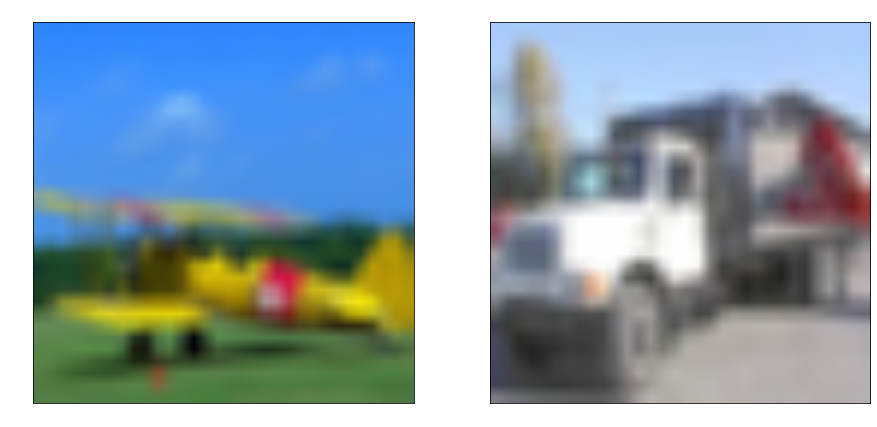

In [18]:
import cv2

plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[44], (250, 250), interpolation=cv2.INTER_LINEAR))
print(f"Original image: {labels_C[np.argmax(y_test_C[44])]}")

plt.subplot(122)
plt.title("Target image")
plt.imshow(cv2.resize(X_test_C[45], (250, 250), interpolation=cv2.INTER_LINEAR))
print(f"Target image: {labels_C[np.argmax(y_test_C[45])]}")

In [179]:
bim = BIM(0.05, loaded_model1)

image = X_test_C[44].reshape((1, img_rows_C, img_cols_C, channels_C))
true_label = y_test_C[44]

image1 = X_test_C[45].reshape((1, img_rows_C, img_cols_C, channels_C))
true_label1 = y_test_C[45]

adv1, pert1 = bim.adversarial_pattern(image, true_label=true_label, alpha=0.05/40, iterations=40)
adv2, pert2 = bim.adversarial_pattern(image1, true_label=true_label1, alpha=0.05/40, iterations=40)

Original image: airplane


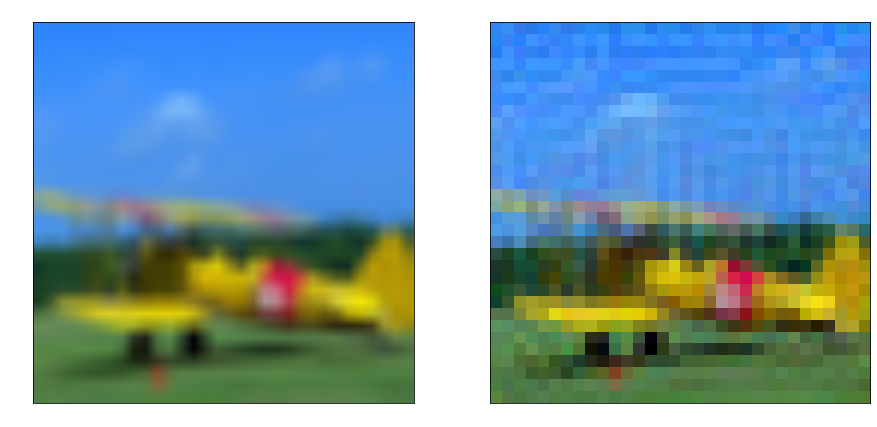

In [180]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[44], (250, 250), interpolation=cv2.INTER_LINEAR))
print(f"Original image: {labels_C[np.argmax(y_test_C[44])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv1, (32, 32, 3)))

Original image: truck


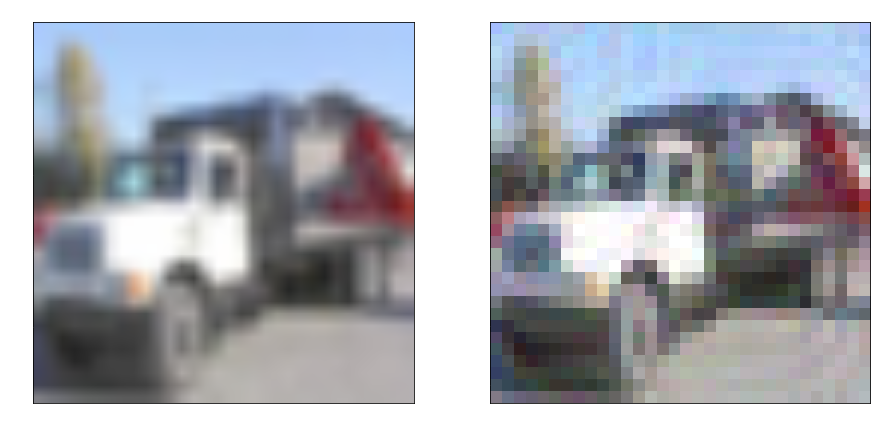

In [21]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[45], (250, 250), interpolation=cv2.INTER_LINEAR))
print(f"Original image: {labels_C[np.argmax(y_test_C[45])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv2, (32, 32, 3)))

In [182]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(adv1).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(adv1).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image).argmax()]}")


Prediction of original network on original image: airplane
Prediction of original network on adversarial image: truck

Prediction of adversarial network on adversarial image: airplane
Prediction of adversarial network on original image: airplane


In [183]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(adv2).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(adv2).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image1).argmax()]}")


Prediction of original network on original image: truck
Prediction of original network on adversarial image: automobile

Prediction of adversarial network on adversarial image: truck
Prediction of adversarial network on original image: truck


## Iterative Least-Likely Class Method - ILLCM
   * experiments with ILLCM:MNIST, CIFAR

In [124]:
illcm = ILLCM(0.25, loaded_model)

image = X_test[125].reshape((1, img_rows, img_cols, channels))
image1 = X_test[233].reshape((1, img_rows, img_cols, channels))

adv1, Y_ll = illcm.adversarial_pattern(image, alpha=0.25/40, iterations=40)
adv2, Y_ll1 = illcm.adversarial_pattern(image1, alpha=0.25/90, iterations=90)

## MNIST

Target image №1 according to ILLCM algorithm: two


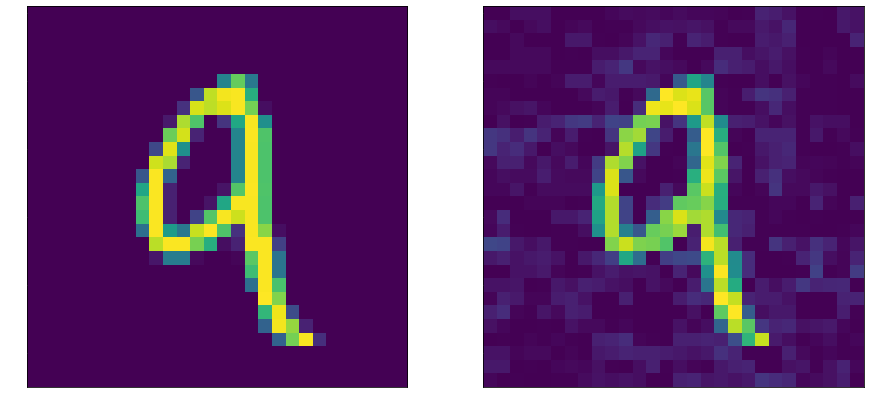

In [85]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(X_test[125].reshape(28, 28))
print(f"Target image №1 according to ILLCM algorithm: {labels[Y_ll]}")

plt.subplot(122)
plt.imshow(tf.reshape(adv1, shape=(28, 28)))

Target image №1 according to ILLCM algorithm: four


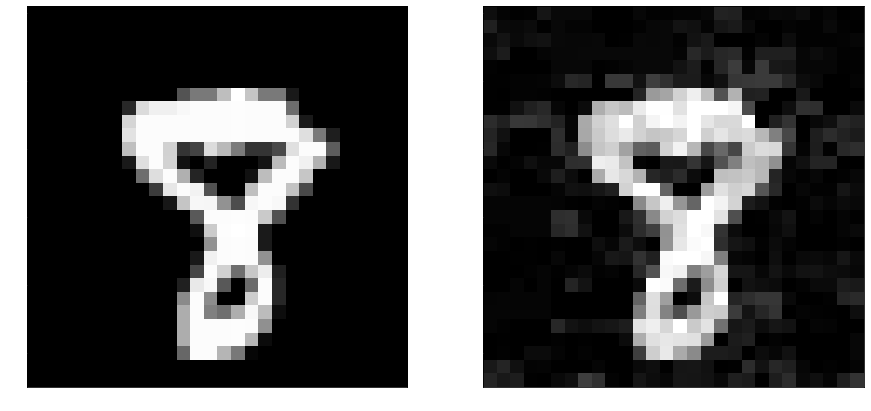

In [127]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(X_test[233].reshape(28, 28), cmap="gray")
print(f"Target image №1 according to ILLCM algorithm: {labels[Y_ll1]}")

plt.subplot(122)
plt.imshow(tf.reshape(adv2, shape=(28, 28)), cmap="gray")

In [86]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(tf.reshape(adv1, (1, img_cols, img_rows, channels))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv1, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image).argmax()]}")

Prediction of original network on original image: nine
Prediction of original network on adversarial image: two

Prediction of adversarial network on adversarial image: nine
Prediction of adversarial network on original image: nine


In [128]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(tf.reshape(adv2, (1, img_cols, img_rows, channels))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv2, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image1).argmax()]}")

Prediction of original network on original image: eight
Prediction of original network on adversarial image: nine

Prediction of adversarial network on adversarial image: nine
Prediction of adversarial network on original image: nine


## CIFAR

In [232]:
illcm = ILLCM(0.25, loaded_model1)
illcm1 = ILLCM(0.15, loaded_model1)
illcm2 = ILLCM(0.06, loaded_model1)

image_C = X_test_C[89].reshape((1, img_rows_C, img_cols_C, channels_C))
image_C1 = X_test_C[895].reshape((1, img_rows_C, img_cols_C, channels_C))
image_C2 = X_test_C[312].reshape((1, img_rows_C, img_cols_C, channels_C))

adv_C1, Y_ll_C = illcm.adversarial_pattern(image_C, alpha=0.25/70, iterations=70)
adv_C2, Y_ll_C1 = illcm1.adversarial_pattern(image_C1, alpha=0.15/70, iterations=70)
adv_C3, Y_ll_C2 = illcm2.adversarial_pattern(image_C2, alpha=0.06/60, iterations=60)

Target image №1 according to ILLCM algorithm: deer


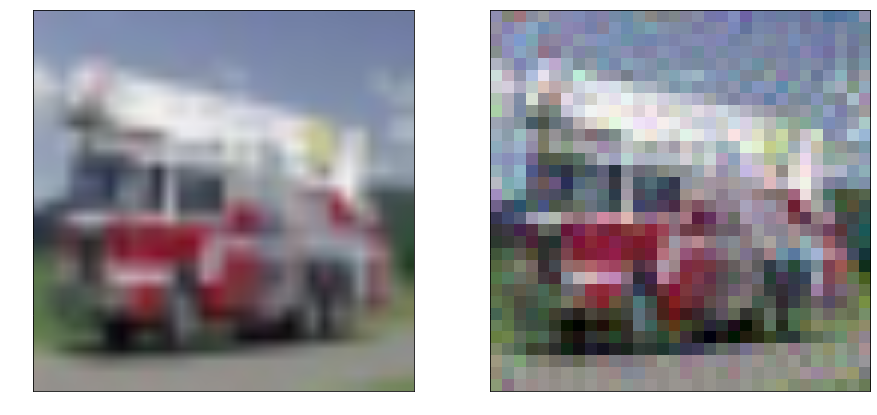

In [158]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(cv2.resize(X_test_C[89], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")
print(f"Target image №1 according to ILLCM algorithm: {labels_C[Y_ll_C]}")

plt.subplot(122)
plt.imshow(tf.reshape(adv_C1, shape=(img_rows_C, img_cols_C, channels_C)), cmap="gray")

Target image №2 according to ILLCM algorithm: deer


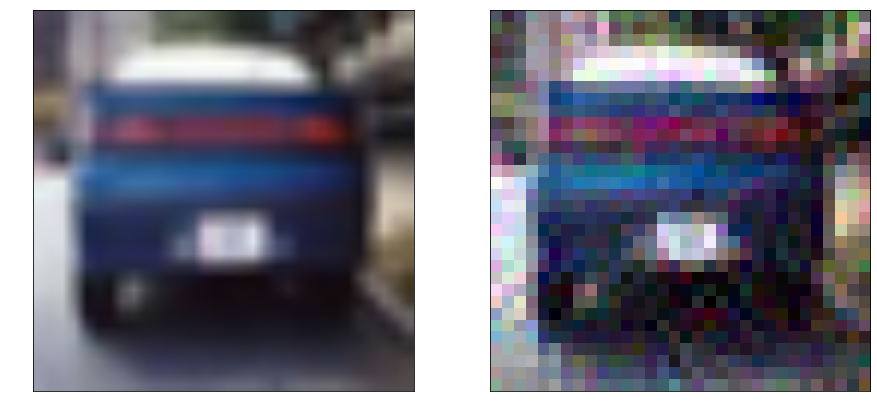

In [209]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(cv2.resize(X_test_C[895], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")
print(f"Target image №2 according to ILLCM algorithm: {labels_C[Y_ll_C1]}")

plt.subplot(122)
plt.imshow(tf.reshape(adv_C2, shape=(img_rows_C, img_cols_C, channels_C)), cmap="gray")

Target image №3 according to ILLCM algorithm: dog


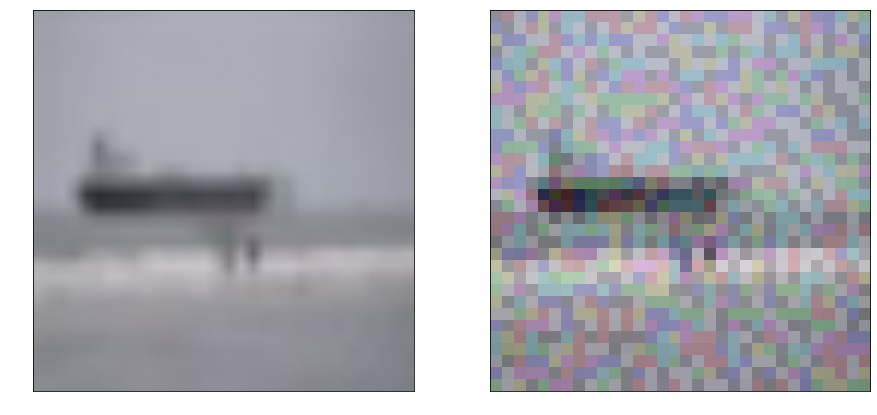

In [32]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(cv2.resize(X_test_C[312], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")
print(f"Target image №3 according to ILLCM algorithm: {labels_C[Y_ll_C2]}")

plt.subplot(122)
plt.imshow(tf.reshape(adv_C3, shape=(img_rows_C, img_cols_C, channels_C)), cmap="gray")

In [241]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_C1, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_C1, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C).argmax()]}")

pred = loaded_model_adv1.predict(tf.reshape(adv_C1, (1, img_cols_C, img_rows_C, channels_C)))
print("\n")
for i, j in zip(labels_C, pred.ravel()):
    print(f"{i}:{j}")

Prediction of original network on original image: truck
Prediction of original network on adversarial image: deer

Prediction of adversarial network on adversarial image: automobile
Prediction of adversarial network on original image: automobile


airplane:9.002529282042815e-07
automobile:0.9320014715194702
bird:1.3212041238830352e-08
cat:4.297049660539898e-10
deer:2.752587047183397e-11
dog:7.2291559405357475e-09
frog:1.15239515707799e-07
horse:7.430154624898933e-08
ship:1.7208529712320342e-08
truck:0.06799741834402084


In [213]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_C2, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_C2, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C1).argmax()]}")


Prediction of original network on original image: automobile
Prediction of original network on adversarial image: cat

Prediction of adversarial network on adversarial image: automobile
Prediction of adversarial network on original image: automobile


In [191]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C2).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_C3, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv1.predict(tf.reshape(adv_C3, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv1.predict(image_C2).argmax()]}")


Prediction of original network on original image: airplane
Prediction of original network on adversarial image: airplane



## Fast-Gradient Sign Method - FGSM:
   * Experiments with FGSM: MNIST, CIFAR

In [36]:
fgsm0 = FGSM(0.6, loaded_model)
fgsm = FGSM(0.6, loaded_model)
fgsm1 = FGSM(0.9, loaded_model)

image0 = X_test[76].reshape((1, img_rows, img_cols, channels))
true_label0 = y_test[76]
image = X_test[5].reshape((1, img_rows, img_cols, channels))
true_label = y_test[5]
image1 = X_test[600].reshape((1, img_rows, img_cols, channels))
true_label1 = y_test[600]

adv_F, pert_F = fgsm.adversarial_pattern(image, true_label=true_label)
adv_F1, pert_F1 = fgsm1.adversarial_pattern(image1, true_label=true_label1)
adv_F0, pert_F0 = fgsm0.adversarial_pattern(image0, true_label=true_label0)

## MNIST

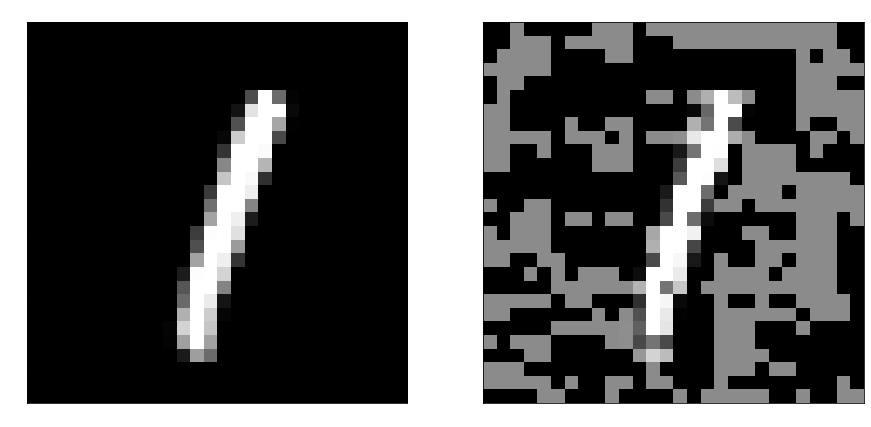

In [37]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(image.reshape(28, 28), cmap="gray")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv_F, (img_rows, img_cols, channels)), cmap="gray")

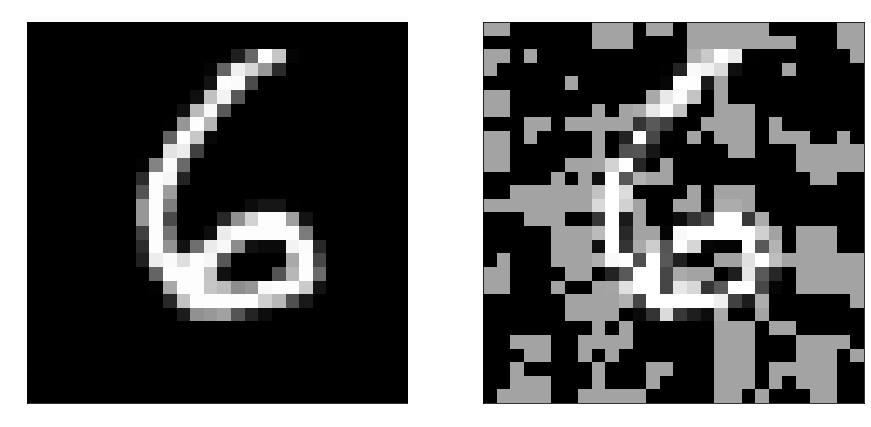

In [38]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(image1.reshape(28, 28), cmap="gray")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv_F1, (img_rows, img_cols, channels)), cmap="gray")

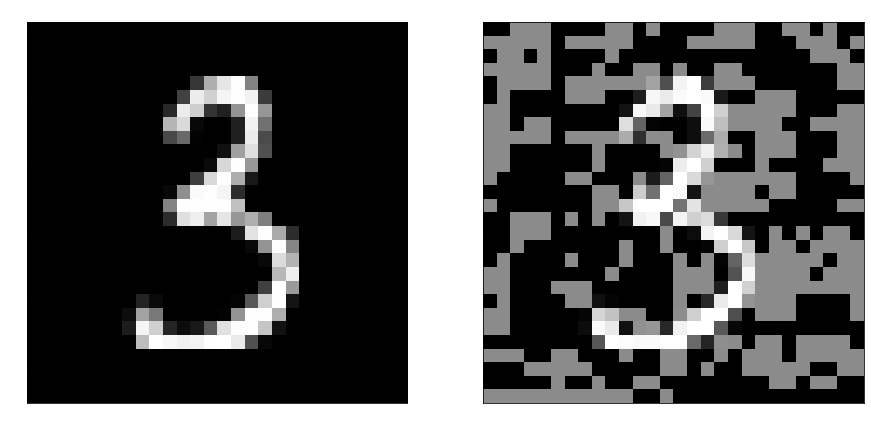

In [39]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(image0.reshape(28, 28), cmap="gray")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv_F0, (img_rows, img_cols, channels)), cmap="gray")

In [40]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image0).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(adv_F0).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv_F0, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image0).argmax()]}")

Prediction of original network on original image: three
Prediction of original network on adversarial image: three

Prediction of adversarial network on adversarial image: three
Prediction of adversarial network on original image: three


In [41]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(adv_F).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv_F, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image).argmax()]}")

Prediction of original network on original image: one
Prediction of original network on adversarial image: seven

Prediction of adversarial network on adversarial image: one
Prediction of adversarial network on original image: one


In [42]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(adv_F1).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv_F1, (1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image1).argmax()]}")

Prediction of original network on original image: six
Prediction of original network on adversarial image: five

Prediction of adversarial network on adversarial image: six
Prediction of adversarial network on original image: six


## CIFAR

In [215]:
fgsm0 = FGSM(0.06, loaded_model1)
fgsm = FGSM(0.06, loaded_model1)
fgsm1 = FGSM(0.1, loaded_model1)

image_C0 = X_test_C[83].reshape((1, img_rows_C, img_cols_C, channels_C))
true_label_C0 = y_test_C[83]
image_C = X_test_C[9].reshape((1, img_rows_C, img_cols_C, channels_C))
true_label_C = y_test_C[9]
image_C1 = X_test_C[434].reshape((1, img_rows_C, img_cols_C, channels_C))
true_label_C1 = y_test_C[434]

adv_FC0, pert_FC0 = fgsm.adversarial_pattern(image_C0, true_label=true_label_C0)
adv_FC, pert_FC = fgsm.adversarial_pattern(image_C, true_label=true_label_C)
adv_FC1, pert_FC1 = fgsm1.adversarial_pattern(image_C1, true_label=true_label_C1)

(1, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image: horse


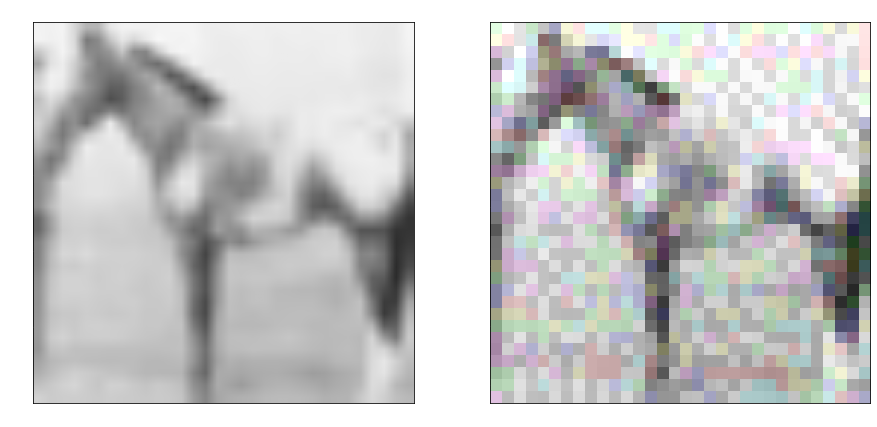

In [44]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(cv2.resize(image_C0.reshape(img_rows_C, img_cols_C, channels_C), (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")

print(f"Original image: {labels_C[np.argmax(y_test_C[83])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv_FC0, (img_rows_C, img_cols_C, channels_C)), cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image: automobile


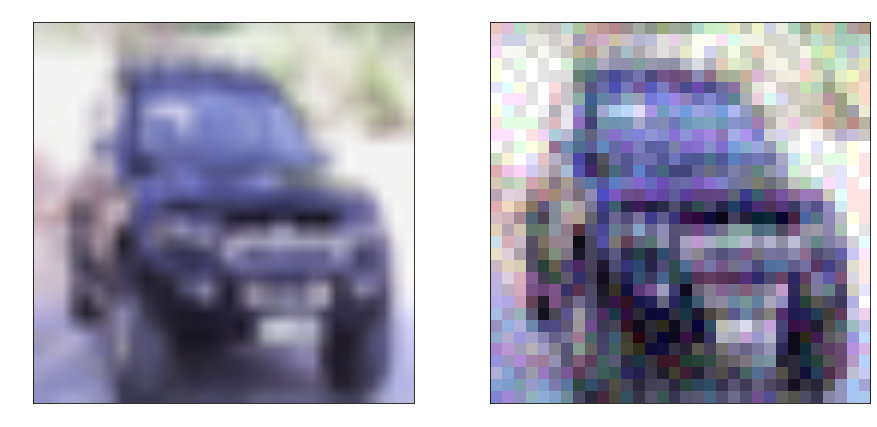

In [45]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[9], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")

print(f"Original image: {labels_C[np.argmax(y_test_C[9])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv_FC, (img_rows_C, img_cols_C, channels_C)), cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image: cat


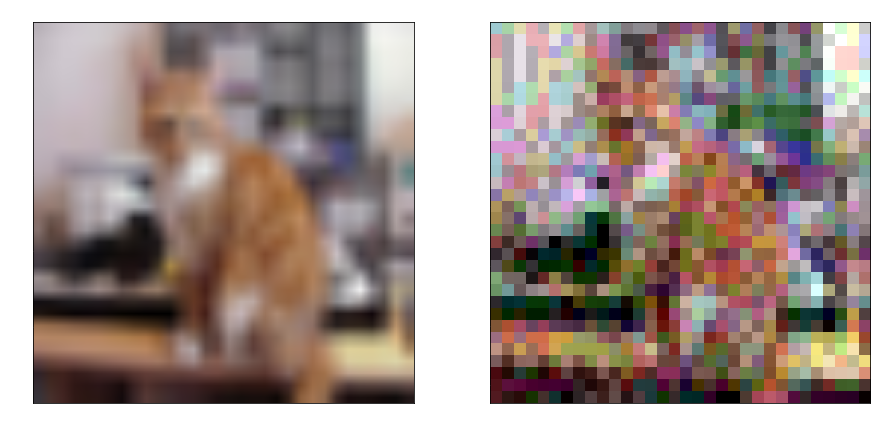

In [46]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[434], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")
print(f"Original image: {labels_C[np.argmax(y_test_C[434])]}")

plt.subplot(122)
plt.title("Adversarial image")
plt.imshow(tf.reshape(adv_FC1, (img_rows_C, img_cols_C, channels_C)), cmap="gray")

In [220]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C0).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_FC0, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_FC0, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C0).argmax()]}")


Prediction of original network on original image: horse
Prediction of original network on adversarial image: frog

Prediction of adversarial network on adversarial image: dog
Prediction of adversarial network on original image: dog


In [219]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_FC, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_FC, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C).argmax()]}")

Prediction of original network on original image: automobile
Prediction of original network on adversarial image: truck

Prediction of adversarial network on adversarial image: automobile
Prediction of adversarial network on original image: automobile


In [225]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_FC1, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_FC1, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C1).argmax()]}")

Prediction of original network on original image: horse
Prediction of original network on adversarial image: frog

Prediction of adversarial network on adversarial image: frog
Prediction of adversarial network on original image: automobile


## Jacobian-based Saliency Map Attack experiments - JSMA:
   * experiments with JSMA:MNIST, CIFAR

In [169]:
jsma = JSMA(img_rows, img_cols, channels, 1.0, loaded_model)


image = X_test[72].reshape((1, img_rows, img_cols, channels))
target = X_test[54].reshape((1, img_rows, img_cols, channels))

image1 = X_test[35].reshape((1, img_rows, img_cols, channels))
target1 = X_test[58].reshape((1, img_rows, img_cols, channels))

adv_J, pert_J = jsma.adversarial_pattern(image, target_image=target, y_inidx=np.argmax(y_test[72]),
                                          y_tidx=np.argmax(y_test[54]), max_iter=90)
adv_J1, pert_J1 = jsma.adversarial_pattern(image1, target_image=target1, y_inidx=np.argmax(y_test[122]),
                                           y_tidx=np.argmax(y_test[58]), max_iter=130)

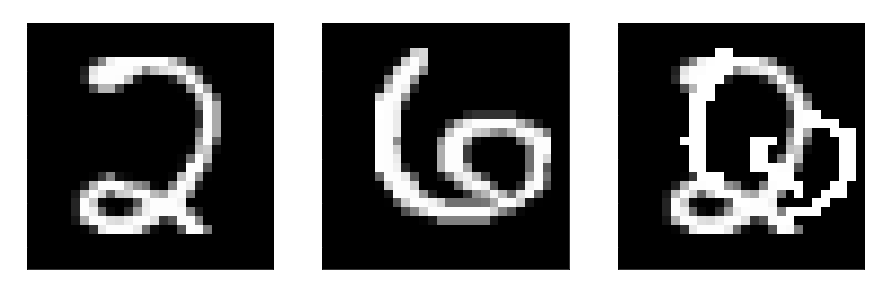

In [51]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.title("Initial image")
plt.imshow(X_test[72], cmap="gray")

plt.subplot(132)
plt.title("Target image")
plt.imshow(X_test[54], cmap="gray")

plt.subplot(133)
plt.title("Adversarial image")
plt.imshow(adv_J.reshape(28, 28), cmap="gray")

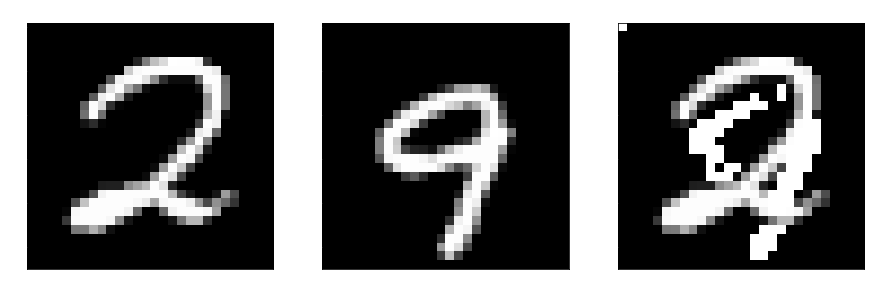

In [52]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.title("Initial image")
plt.imshow(X_test[35], cmap="gray")

plt.subplot(132)
plt.title("Target image")
plt.imshow(X_test[58], cmap="gray")

plt.subplot(133)
plt.title("Adversarial image")
plt.imshow(adv_J1.reshape(28, 28), cmap="gray")

In [170]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(tf.reshape(adv_J, shape=(1, img_cols, img_rows, channels))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv_J, shape=(1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image).argmax()]}")

Prediction of original network on original image: two
Prediction of original network on adversarial image: six

Prediction of adversarial network on adversarial image: zero
Prediction of adversarial network on original image: two


In [54]:
print(f"Prediction of original network on original image: {labels[loaded_model.predict(image).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels[loaded_model.predict(tf.reshape(adv_J1, shape=(1, img_cols, img_rows, channels))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels[loaded_model_adv.predict(tf.reshape(adv_J1, shape=(1, img_cols, img_rows, channels))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels[loaded_model_adv.predict(image).argmax()]}")

Prediction of original network on original image: two
Prediction of original network on adversarial image: nine

Prediction of adversarial network on adversarial image: eight
Prediction of adversarial network on original image: two


## CIFAR

In [243]:
jsma_C = JSMA(img_rows_C, img_cols_C, channels_C, 1.0, loaded_model1)


image_C = X_test_C[91].reshape((1, img_rows_C, img_cols_C, channels_C))
target_C = X_test_C[65].reshape((1, img_rows_C, img_cols_C, channels_C))

image_C1 = X_test_C[126].reshape((1, img_rows_C, img_cols_C, channels_C))
target_C1 = X_test_C[47].reshape((1, img_rows_C, img_cols_C, channels_C))

adv_JC, pert_JC = jsma_C.adversarial_pattern(image_C, target_image=target_C, y_inidx=np.argmax(y_test_C[91]),
                                          y_tidx=np.argmax(y_test_C[65]), max_iter=170)
adv_JC1, pert_JC1 = jsma_C.adversarial_pattern(image_C1, target_image=target_C1, y_inidx=np.argmax(y_test_C[126]),
                                           y_tidx=np.argmax(y_test_C[47]), max_iter=390)

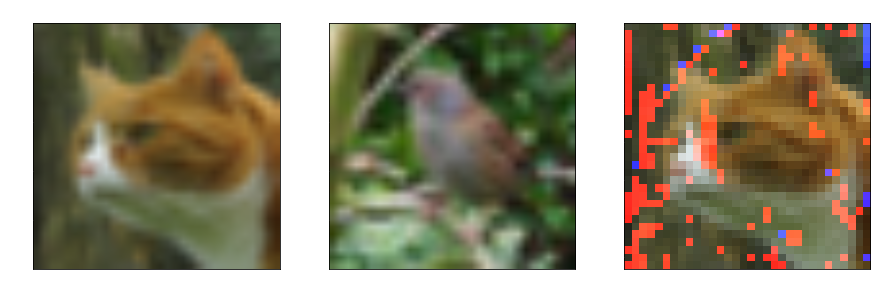

In [56]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[91], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")

plt.subplot(132)
plt.title("Target image")
plt.imshow(cv2.resize(X_test_C[65], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")

plt.subplot(133)
plt.title("Adversarial image")
plt.imshow(adv_JC.reshape(img_rows_C, img_rows_C, channels_C), cmap="gray")

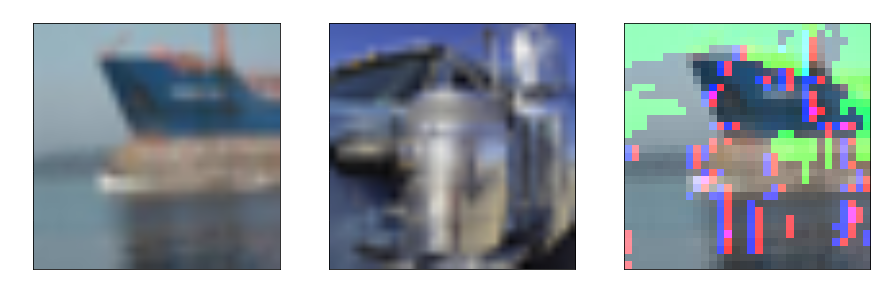

In [57]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.title("Initial image")
plt.imshow(cv2.resize(X_test_C[126], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")

plt.subplot(132)
plt.title("Target image")
plt.imshow(cv2.resize(X_test_C[47], (250, 250), interpolation=cv2.INTER_LINEAR), cmap="gray")

plt.subplot(133)
plt.title("Adversarial image")
plt.imshow(adv_JC1.reshape(img_rows_C, img_rows_C, channels_C), cmap="gray")

In [244]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_JC, shape=(1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_JC, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C).argmax()]}")

pred = loaded_model_adv1.predict(tf.reshape(adv_JC, (1, img_cols_C, img_rows_C, channels_C)))
print("\n")
for i, j in zip(labels_C, pred.ravel()):
    print(f"{i}:{j}")

Prediction of original network on original image: cat
Prediction of original network on adversarial image: bird

Prediction of adversarial network on adversarial image: frog
Prediction of adversarial network on original image: frog


airplane:1.4146487536947916e-08
automobile:2.3002225134405307e-05
bird:0.00012239065836183727
cat:0.00010524896788410842
deer:0.00036295002792030573
dog:9.097912698052824e-05
frog:0.997108519077301
horse:0.0021833761129528284
ship:4.1788197790992854e-07
truck:2.9299460493348306e-06


In [228]:
print(f"Prediction of original network on original image: {labels_C[loaded_model1.predict(image_C1).argmax()]}")
print(f"Prediction of original network on adversarial image: {labels_C[loaded_model1.predict(tf.reshape(adv_JC1, shape=(1, img_cols_C, img_rows_C, channels_C))).argmax()]}\n")

print(f"Prediction of adversarial network on adversarial image: {labels_C[loaded_model_adv1.predict(tf.reshape(adv_JC1, (1, img_cols_C, img_rows_C, channels_C))).argmax()]}")
print(f"Prediction of adversarial network on original image: {labels_C[loaded_model_adv1.predict(image_C1).argmax()]}")

Prediction of original network on original image: ship
Prediction of original network on adversarial image: truck

Prediction of adversarial network on adversarial image: airplane
Prediction of adversarial network on original image: ship
